## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio.

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*.

Question *7* is about data ethics issue.

In [266]:
your_name = "Suraksha Dahal"
your_student_id = "48374717"

In [267]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [269]:
#Importing the data
df=pd.read_csv('car_sells_clean_data.csv')

#Printing the shape and length
print(df.shape)
print(len(df))
df.head()

(3657, 8)
3657


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [271]:
#Q2.1
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [272]:
#Q2.2 Encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

#fuel
df['fuel_code'] = encoder.fit_transform(df[['fuel']])
df[["fuel", "fuel_code"]].head(10)


,fuel,fuel_code
0,Petrol,1.0
1,Petrol,1.0
2,Diesel,0.0
3,Petrol,1.0
4,Diesel,0.0
5,Petrol,1.0
6,Petrol,1.0
7,Petrol,1.0
8,Petrol,1.0
9,Petrol,1.0


In [273]:
#seller
df['seller_type_code'] = encoder.fit_transform(df[['seller_type']])
df[["seller_type", "seller_type_code"]].head(10)


,seller_type,seller_type_code
0,Individual,1.0
1,Individual,1.0
2,Individual,1.0
3,Individual,1.0
4,Individual,1.0
5,Individual,1.0
6,Individual,1.0
7,Individual,1.0
8,Individual,1.0
9,Individual,1.0


In [274]:
#owner
df['owner_code'] = encoder.fit_transform(df[['owner']])
df[["owner", "owner_code"]].head(10)

,owner,owner_code
0,First Owner,0.0
1,First Owner,0.0
2,First Owner,0.0
3,First Owner,0.0
4,Second Owner,1.0
5,First Owner,0.0
6,Second Owner,1.0
7,First Owner,0.0
8,First Owner,0.0
9,First Owner,0.0


In [275]:
#Q2.2 Correlation calculation
#year and selling_price
corr_year_price=df["year"].corr(df["selling_price"])
print("The correlation between year and selling price is:",corr_year_price)

#fuel and selling_price
corr_fuel_price=df["fuel_code"].corr(df["selling_price"])
print("The correlation between fuel and selling price is:",corr_fuel_price)

#km_driven and selling_price
corr_km_price=df["km_driven"].corr(df["selling_price"])
print("The correlation between km_driven and selling price is:",corr_km_price)

#seller_type and selling_price
corr_seller_price=df["seller_type_code"].corr(df["selling_price"])
print("The correlation between seller_type and selling price is:",corr_seller_price)

#owner and selling_price
corr_owner_price=df["owner_code"].corr(df["selling_price"])
print("The correlation between owner and selling price is:",corr_owner_price)

The correlation between year and selling price is: 0.4111027622063296
The correlation between fuel and selling price is: -0.27762704341734995
The correlation between km_driven and selling price is: -0.17720277985723865
The correlation between seller_type and selling price is: -0.20863704840276964
The correlation between owner and selling price is: -0.205523587311224


In [276]:
#Explaination
''' The most correlated features are year and fuel and the least correlated features are km-driven and owner.
By carrying out these experiments, we can verify how the correlations seen here correspond to the actual behavior
in predicting car selling prices of the model.'''

' The most correlated features are year and fuel and the least correlated features are km-driven and owner.\nBy carrying out these experiments, we can verify how the correlations seen here correspond to the actual behavior\nin predicting car selling prices of the model.'

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [278]:
#case 1
train_1,test_1=train_test_split(df,test_size=0.9,random_state=42)
print(df.shape)
print(train_1.shape)
print(test_1.shape)

(3657, 11)
(365, 11)
(3292, 11)


In [279]:
#case 2
train_2,test_2=train_test_split(df,test_size=0.1,random_state=42)
print(df.shape)
print(train_2.shape)
print(test_2.shape)

(3657, 11)
(3291, 11)
(366, 11)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [281]:
#model a
lr_a=linear_model.LinearRegression()
x_train_a=train_1[['fuel_code','year']]
y_train_a=train_1['selling_price']

x_test_a=test_1[['fuel_code','year']]
y_test_a=test_1['selling_price']

lr_a.fit(x_train_a,y_train_a)


LinearRegression()

In [282]:
#model b
lr_b=linear_model.LinearRegression()
x_train_b=train_1[['owner_code','km_driven']]
y_train_b=train_1['selling_price']

x_test_b=test_1[['owner_code','km_driven']]
y_test_b=test_1['selling_price']

lr_b.fit(x_train_b,y_train_b)

LinearRegression()

In [283]:
#model c
lr_c=linear_model.LinearRegression()
x_train_c=train_2[['fuel_code','year']]
y_train_c=train_2['selling_price']

x_test_c=test_2[['fuel_code','year']]
y_test_c=test_2['selling_price']

lr_c.fit(x_train_c,y_train_c)

LinearRegression()

In [284]:
#modeld
lr_d=linear_model.LinearRegression()
x_train_d=train_2[['owner_code','km_driven']]
y_train_d=train_2['selling_price']

x_test_d=test_2[['owner_code','km_driven']]
y_test_d=test_2['selling_price']

lr_d.fit(x_train_d,y_train_d)

LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [286]:
#model a
predicted_a=lr_a.predict(x_test_a)
mse_a=((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
rmse_a=np.sqrt(mse_a)

print('The MSE for model a is:', mse_a)
print('The RMSE for model a is:', rmse_a)


The MSE for model a is: 240873725575.09427
The RMSE for model a is: 490788.8808592695


In [287]:
#model b
predicted_b=lr_b.predict(x_test_b)
mse_b=((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
rmse_b=np.sqrt(mse_b)

print('The MSE for model b is:', mse_b)
print('The RMSE for model b is:', rmse_b)

The MSE for model b is: 292715789614.6963
The RMSE for model b is: 541032.152108076


In [288]:
#model c
predicted_c=lr_c.predict(x_test_c)
mse_c=((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
rmse_c=np.sqrt(mse_c)

print('The MSE for model c is:', mse_c)
print('The RMSE for model c is:', rmse_c)

The MSE for model c is: 141350876932.57748
The RMSE for model c is: 375966.5901813318


In [289]:
#model d
predicted_d=lr_d.predict(x_test_d)
mse_d=((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
rmse_d=np.sqrt(mse_d)

print('The MSE for model d is:', mse_d)
print('The RMSE for model d is:', rmse_d)

The MSE for model d is: 195254216561.59534
The RMSE for model d is: 441875.7931382928


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

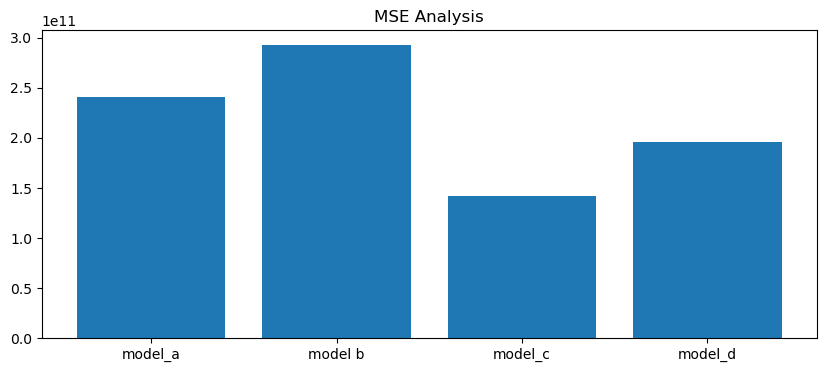

In [291]:
#for MSE
mse_df=pd.DataFrame(
    {'mse':[mse_a,mse_b,mse_c,mse_d]},
    index=['model_a','model b', 'model_c','model_d']
)

mse_df.head()

plt.figure(figsize=(10,4))
plt.title('MSE Analysis')
plt.bar(data=mse_df,height='mse',x=['model_a','model b', 'model_c','model_d'])
plt.show()

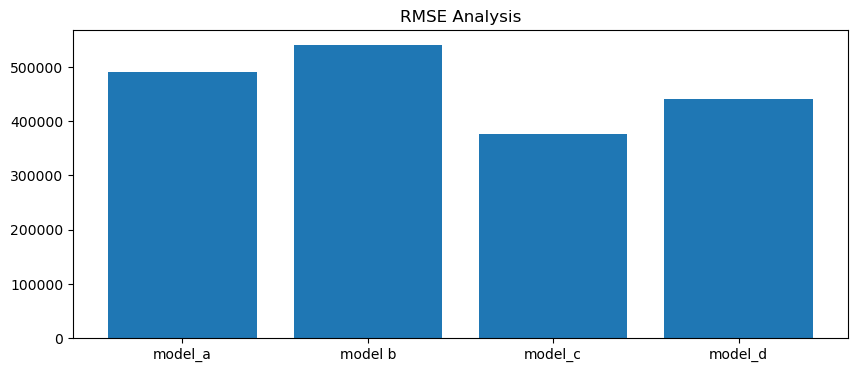

In [292]:
#for RMSE
rmse_df=pd.DataFrame(
    {'mse':[rmse_a,rmse_b,rmse_c,rmse_d]},
    index=['model_a','model b', 'model_c','model_d']
)

rmse_df.head()

plt.figure(figsize=(10,4))
plt.title('RMSE Analysis')
plt.bar(data=rmse_df,height='mse',x=['model_a','model b', 'model_c','model_d'])
plt.show()

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [294]:
''' The two tables are based on total medals and gold medals sorted by the nations. 
These may create confusion among viewers as Table 1 contains United States as no. 1 and Table 2 contains China is number 1 position in ranking.
This may create a false narrative of the nations as manipulated by the author. The source of the data taken is also not clear and transparent.
The table should be more explicitly labeled to provide an explanation for the various sorting techniques utilized. 
In conclusion, improved labeling and attention for accessibility would make the infographic clearer and more morally sound, 
even though it is still informative.'''

' The two tables are based on total medals and gold medals sorted by the nations. \nThese may create confusion among viewers as Table 1 contains United States as no. 1 and Table 2 contains China is number 1 position in ranking.\nThis may create a false narrative of the nations as manipulated by the author. The source of the data taken is also not clear and transparent.\nThe table should be more explicitly labeled to provide an explanation for the various sorting techniques utilized. \nIn conclusion, improved labeling and attention for accessibility would make the infographic clearer and more morally sound, \neven though it is still informative.'